# **Porter- Logistics & Operational Performance Analysis**

### **Introduction**


Efficient logistics operations depend on accurately balancing **customer demand, partner availability and delivery performance**. In fast-paced on-demand delivery platforms like Porter, understanding order patterns, revenue drivers  and operational bottlenecks is critical for maintaining service quality while controlling costs.

This project focuses on analyzing a **logistics order dataset from Porter** using Python to uncover meaningful business insights. The analysis examines order volume, revenue contribution, market and protocol performance, time-based demand trends, and customer behavior. Additionally, **operational efficiency metrics** such as **partner utilisation rate, orders per partner** and delivery time are derived to evaluate system performance during peak and non-peak periods.

The objective of this analysis is not only to explore historical data but also to translate analytical findings into actionable business recommendations that can support **capacity planning, performance optimization and strategic decision-making** in logistics operations.
###  **Objectives of the Analysis**
- Identify high-performing markets, protocols and food categories
- Analyze peak-hour and weekend demand patterns
- Evaluate revenue concentration and **customer ordering behavior**
- Recommend data-driven actions to **improve operational efficiency** and **delivery performance**

### **Tools & Technique**

Languages & Libraries: Python, Pandas, NumPy, Matplotlib, Seaborn

Techniques: Data wrangling, Feature Engineering, Exploratory Data Analysis (EDA), Operation analysis

Deliverables: Insight Report and Business Recommendations

### 📌 Why this project matters
This notebook demonstrates an end-to-end analytical workflow — from raw data exploration to business insight generation — reflecting the practical responsibilities of a Data Analyst in logistics and operations.

## Data Structure and Overview

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
data=pd.read_csv(r"D:\tarang_sir_pdfs\data\porter dataset.csv")

In [213]:
df=data.copy()

In [214]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [215]:
df.shape

(197428, 14)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [217]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [218]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [219]:
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [220]:
df.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0


In [221]:
df['created_at']=pd.to_datetime(df['created_at'])

In [222]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [223]:
df['week_day']=df['created_at'].dt.strftime('%a')

In [224]:
df['week_of_month'] = df['created_at'].apply(lambda d: (d.day - 1) // 7 + 1)

In [225]:
df['order_hour']=df['created_at'].dt.hour

In [226]:
df['deliver_time_min']=(df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60

In [227]:
df=df.drop(columns=['created_at','actual_delivery_time','store_id'],axis=1)

## missing value handling

In [228]:
df.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,week_day,week_of_month,order_hour,deliver_time_min
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,Fri,1,22,62.983333
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,Tue,2,21,67.066667


In [229]:
df.isna().sum()

market_id                     987
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
week_day                        0
week_of_month                   0
order_hour                      0
deliver_time_min                7
dtype: int64

In [230]:
df['market_id']=df['market_id'].fillna('unknown')

In [231]:
df.groupby('order_protocol')['store_primary_category'].apply(lambda x:x.isna().sum())

order_protocol
1.0    2224
2.0     376
3.0     806
4.0     351
5.0     494
6.0       2
7.0       0
Name: store_primary_category, dtype: int64

In [232]:
df['store_primary_category']=df['store_primary_category'].fillna('unknown')

In [233]:
df.groupby('market_id')['order_protocol'].apply(lambda x:x.isna().sum())

market_id
1.0         91
2.0        148
3.0         54
4.0        126
5.0         49
6.0         40
unknown    487
Name: order_protocol, dtype: int64

In [234]:
df['order_protocol']=df['order_protocol'].fillna('unknown')

In [235]:
df['total_onshift_partners']=df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())

In [236]:
df['total_busy_partners']=df['total_busy_partners'].fillna(df['total_busy_partners'].median())

In [237]:
df['total_outstanding_orders']=df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())

In [238]:
df=df.dropna(subset=['deliver_time_min'])

## Feature Engineering

In [239]:
df['partner_utilization_rate']=df['total_busy_partners']/df['total_onshift_partners']

In [240]:
df=df.dropna(subset=['partner_utilization_rate'])

In [241]:
df['order_per_partner']=df['total_outstanding_orders']/df['total_onshift_partners']

In [242]:
df=df.dropna(subset=['order_per_partner'])

In [243]:
df.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
week_day                    0
week_of_month               0
order_hour                  0
deliver_time_min            0
partner_utilization_rate    0
order_per_partner           0
dtype: int64

## EDA

In [244]:
df.head(1)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,week_day,week_of_month,order_hour,deliver_time_min,partner_utilization_rate,order_per_partner
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,Fri,1,22,62.983333,0.424242,0.636364


**Visualization of count of categorical columns**

<Axes: xlabel='week_of_month', ylabel='count'>

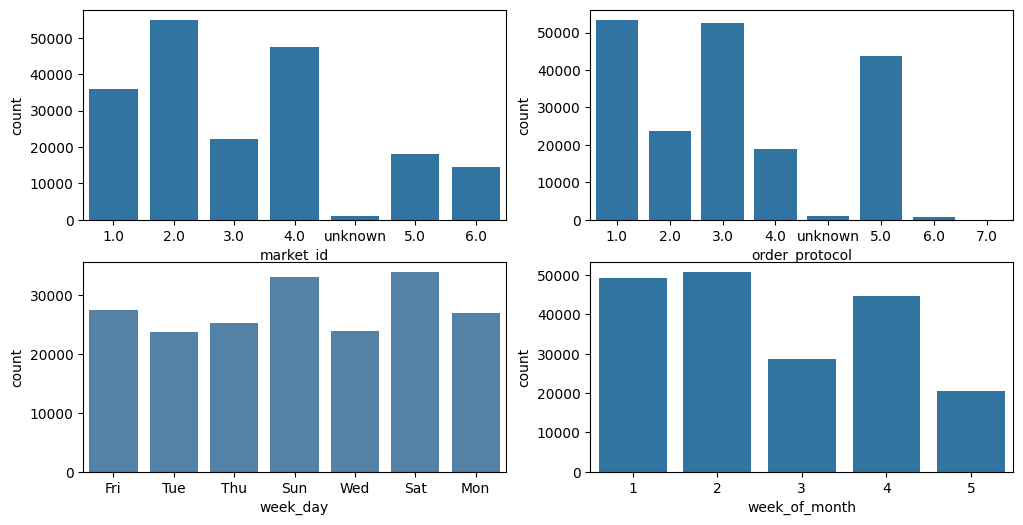

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.countplot(data=df,x='market_id')
plt.subplot(2,2,2)
sns.countplot(data=df,x='order_protocol')
plt.subplot(2,2,3)
sns.countplot(data=df,x='week_day',color='steelblue')
plt.subplot(2,2,4)
sns.countplot(data=df,x='week_of_month')

**dropping unexpected value of delivery time**

<Axes: xlabel='deliver_time_min'>

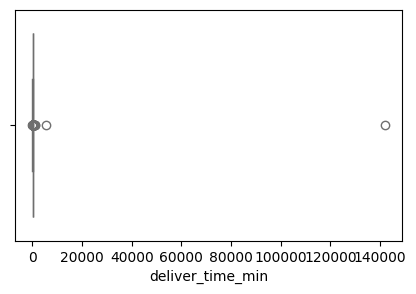

In [246]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='deliver_time_min',color='skyblue')

In [247]:
df=df[df['deliver_time_min']<5000]

<Axes: xlabel='deliver_time_min'>

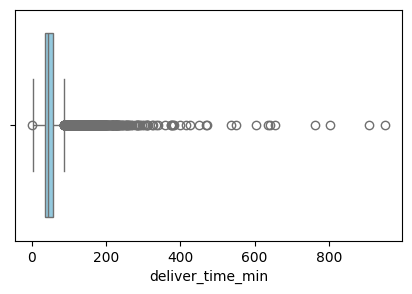

In [248]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='deliver_time_min',color='skyblue')

In [249]:
df.keys()

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'week_day', 'week_of_month', 'order_hour',
       'deliver_time_min', 'partner_utilization_rate', 'order_per_partner'],
      dtype='object')

In [250]:
df['market_id'].value_counts(normalize=True).mul(100).cumsum()

market_id
2.0         28.380254
4.0         52.911437
1.0         71.408231
3.0         82.781071
5.0         92.050103
6.0         99.499585
unknown    100.000000
Name: proportion, dtype: float64

insight- 71% orders r coming from 2,4,1 market id,

In [251]:
df['order_protocol'].value_counts(normalize=True).mul(100).cumsum()

order_protocol
1.0         27.585780
3.0         54.648445
5.0         77.219755
2.0         89.435563
4.0         99.142072
unknown     99.648678
6.0         99.990714
7.0        100.000000
Name: proportion, dtype: float64

insight-  1,3 and 5 are the most popular protocal, over 75% orders are placed through it

In [252]:
df['week_day'].value_counts(normalize=True)

week_day
Sat    0.175083
Sun    0.170451
Fri    0.141133
Mon    0.138811
Thu    0.129989
Wed    0.122746
Tue    0.121787
Name: proportion, dtype: float64

insight- order volume increseed by 5% in weekend

In [253]:
df['week_of_month'].value_counts(normalize=True).mul(100)

week_of_month
2    26.263549
1    25.359706
4    22.994341
3    14.763283
5    10.619122
Name: proportion, dtype: float64

insight- order volume suddenly drop by 11% in 3rd week

**Food category distribution**

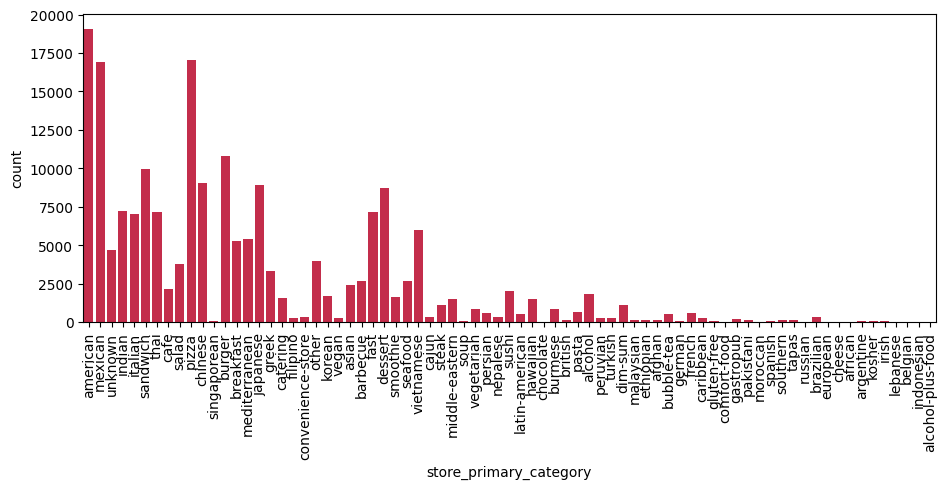

In [254]:
plt.figure(figsize=(11,4))
sns.countplot(data=df,x='store_primary_category',color='crimson')
plt.xticks(rotation=90)
plt.show()

#### Top 10 most popular food category among customers

In [279]:
df['store_primary_category'].value_counts(normalize=True).mul(100).head(15).cumsum()

store_primary_category
american          9.847348
pizza            18.655688
mexican          27.395416
burger           32.955700
sandwich         38.076445
chinese          42.740625
japanese         47.330001
dessert          51.813619
indian           55.532684
fast             59.239369
thai             62.937283
italian          66.550075
vietnamese       69.637689
mediterranean    72.437435
breakfast        75.165988
Name: proportion, dtype: float64

 insight - Top 10 food categories are responsible for 60% ordrers

#### distribution of total_items

In [256]:
dist=df['total_items'].value_counts(normalize=True).mul(100).head(5)
dist

total_items
2    27.950000
1    20.599054
3    19.877321
4    12.731184
5     7.111056
Name: proportion, dtype: float64

insight- order volume of 86% people are =<5 

In [257]:
df.head(1)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,week_day,week_of_month,order_hour,deliver_time_min,partner_utilization_rate,order_per_partner
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,Fri,1,22,62.983333,0.424242,0.636364


#### distribution of numerical features 

<Axes: xlabel='partner_utilization_rate', ylabel='Count'>

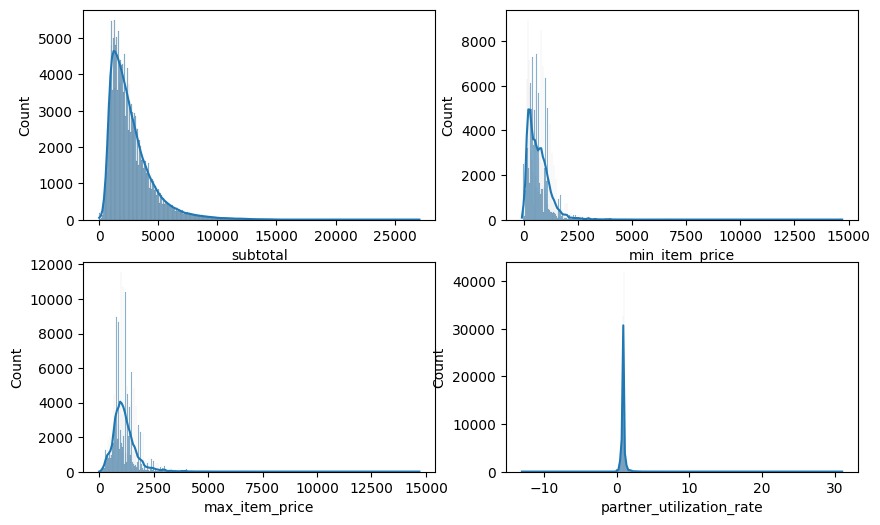

In [258]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(data=df,x='subtotal',kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df,x='min_item_price',kde=True)
plt.subplot(2,2,3)
sns.histplot(data=df,x='max_item_price',kde=True)
plt.subplot(2,2,4)
sns.histplot(data=df,x='partner_utilization_rate',kde=True)

In [259]:
df['num_distinct_items'].value_counts(normalize=True).mul(100).head()

num_distinct_items
2    29.987257
1    25.262718
3    21.193877
4    11.746862
5     5.952878
Name: proportion, dtype: float64

insight- 75% people are ordering <=3 distinct item

#### peak hour of orders

Text(0, 0.5, 'order count')

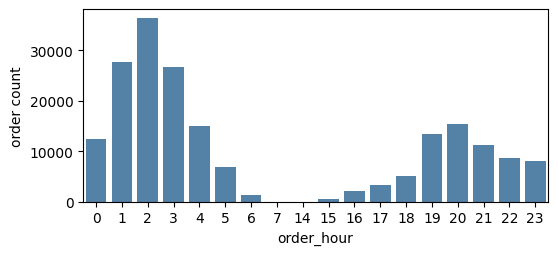

In [260]:
plt.figure(figsize=(6,2.5))
sns.countplot(data=df,x='order_hour',color='steelblue')
plt.ylabel('order count')

insight- highest number of orders placed between 12pm-4pm,showing mid-night as the peak order hour

## Bi-variate analysis

#### Most revenue generating protocal

In [261]:
df.groupby('order_protocol')['subtotal'].sum().sort_values(ascending=False).pipe(lambda x: x / x.sum() * 100).cumsum()

order_protocol
3.0         29.059076
1.0         57.823768
5.0         80.527322
2.0         92.704584
4.0         99.214853
unknown     99.722755
6.0         99.990385
7.0        100.000000
Name: subtotal, dtype: float64

insight- 3,1 and 5 are responsible for 80% of revenue

#### Market region generating most revenue

In [262]:
df.groupby('market_id')['subtotal'].sum().sort_values(ascending=False).pipe(lambda x : x/x.sum()*100).cumsum()

market_id
2.0         27.826316
4.0         54.296208
1.0         73.187220
3.0         84.199071
5.0         92.528662
6.0         99.500881
unknown    100.000000
Name: subtotal, dtype: float64

insight- Market id 2,4,1 are generationg most revenue (73%)

#### Top selling categories by revenue

In [263]:
df.groupby('store_primary_category')['subtotal'].sum().sort_values(ascending=False).pipe(lambda x:x/x.sum()*100 ).cumsum().head(15)

store_primary_category
pizza             9.870552
american         19.620967
mexican          27.094222
japanese         32.853717
italian          37.885425
chinese          42.863449
burger           47.439892
thai             51.726110
dessert          55.801441
indian           59.818135
sandwich         63.813204
mediterranean    66.626216
vietnamese       69.226588
unknown          71.750559
breakfast        74.127708
Name: subtotal, dtype: float64

In [278]:
df['store_primary_category'].value_counts(normalize=True).mul(100).cumsum().head(15)

store_primary_category
american          9.847348
pizza            18.655688
mexican          27.395416
burger           32.955700
sandwich         38.076445
chinese          42.740625
japanese         47.330001
dessert          51.813619
indian           55.532684
fast             59.239369
thai             62.937283
italian          66.550075
vietnamese       69.637689
mediterranean    72.437435
breakfast        75.165988
Name: proportion, dtype: float64

insight-Top 20% primary category are responsible for 75% of total revenue 

In [264]:
df.groupby('week_day')['subtotal'].sum().sort_values(ascending=False).pipe(lambda x:x/x.sum()*100 )

week_day
Sat    18.305386
Sun    17.781148
Mon    14.007672
Fri    13.739652
Thu    12.579922
Wed    11.880662
Tue    11.705558
Name: subtotal, dtype: float64

insight- ~5% revenue increment in weekends

In [265]:
df.groupby('order_hour')['subtotal'].sum().sort_index(ascending=True).pipe(lambda x:x/x.sum()*100 ).cumsum().head(10)

order_hour
0      6.868985
1     24.064576
2     45.739693
3     59.968033
4     67.276002
5     70.260473
6     70.811436
7     70.815416
14    70.818483
15    70.977040
Name: subtotal, dtype: float64

insight- peak hour(12am-5am) alone responsible for 70% of revenue

#### Average delivery time  per market id

In [266]:
df.groupby('market_id')['deliver_time_min'].median().sort_values(ascending=False).round(2)

market_id
1.0        46.63
unknown    44.48
4.0        44.40
3.0        43.80
6.0        43.58
5.0        43.40
2.0        43.33
Name: deliver_time_min, dtype: float64

#### Average delivery time  by order_protocol 

In [267]:
df.groupby('order_protocol')['deliver_time_min'].median().sort_values(ascending=False).round(2)

order_protocol
6.0        55.25
1.0        46.42
4.0        44.15
2.0        44.07
3.0        43.67
unknown    43.39
5.0        42.33
7.0        36.08
Name: deliver_time_min, dtype: float64

insight- Order protocal 7 has fastest delivery while Order protocal 6 has slowest delivery

#### Average delivery time by week day

In [268]:
df.groupby('week_day')['deliver_time_min'].median().sort_values(ascending=False).round(2)

week_day
Sat    47.06
Mon    46.62
Sun    45.20
Thu    43.25
Tue    43.22
Fri    42.25
Wed    41.47
Name: deliver_time_min, dtype: float64

#### Average delivery time  by hours of day

In [269]:
df.groupby('order_hour')['deliver_time_min'].median().sort_index(ascending=True).round(2)

order_hour
0     40.78
1     45.75
2     51.13
3     49.03
4     41.00
5     36.55
6     37.83
7     48.63
14    55.27
15    45.77
16    43.42
17    40.75
18    37.62
19    43.13
20    41.20
21    38.08
22    38.82
23    39.72
Name: deliver_time_min, dtype: float64

## operationl analysis

In [270]:
df=df.drop(columns=['total_onshift_partners','total_busy_partners','total_outstanding_orders'])

In [271]:
df.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,week_day,week_of_month,order_hour,deliver_time_min,partner_utilization_rate,order_per_partner
0,1.0,american,1.0,4,3441,4,557,1239,Fri,1,22,62.983333,0.424242,0.636364
1,2.0,mexican,2.0,1,1900,1,1400,1400,Tue,2,21,67.066667,2.000000,2.000000


In [272]:
df.groupby('order_hour')['partner_utilization_rate'].median().sort_index(ascending=True)

order_hour
0     0.918919
1     0.923077
2     0.938776
3     0.965116
4     0.977444
5     0.962963
6     0.944444
7     0.918919
14    0.500000
15    1.000000
16    1.000000
17    1.000000
18    0.918919
19    0.961538
20    0.968750
21    0.928571
22    0.923077
23    0.923077
Name: partner_utilization_rate, dtype: float64

In [273]:
df.groupby('order_hour')['order_per_partner'].median().sort_index(ascending=True)

order_hour
0     1.000000
1     1.133333
2     1.316176
3     1.350000
4     1.166667
5     1.108108
6     1.090909
7     1.108108
14    0.500000
15    1.000000
16    1.000000
17    1.108108
18    1.000000
19    1.217391
20    1.156556
21    1.043478
22    1.000000
23    1.000000
Name: order_per_partner, dtype: float64

**insight-** high utilization ratio is not due to excess orders, but due to limited partner availability.
Risk- system is not ready for very little buffer like- sudden demand spike, partner drop_offs that can cause longer delivery time leading to customer dissatisfaction.
recomendation- during peak hour(12am-5am )& weekend increse on shift partner by 5-10% which reduce utiliasation rate by 80-85%

#### Relationship between order size and delivery duration

In [274]:
df['total_items'].corr(df['deliver_time_min'])

np.float64(0.11157303179540794)

insight- there is no correletion between order size and delivery duration

<Axes: >

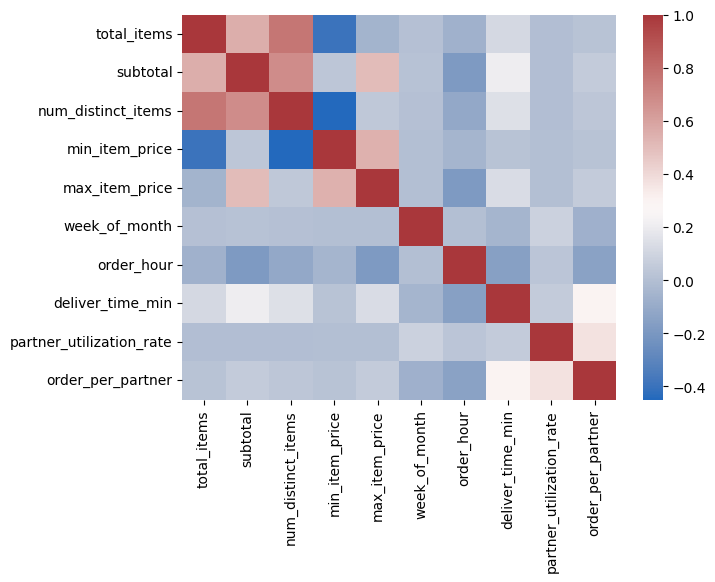

In [275]:
x=df.select_dtypes(include='number').corr()
plt.figure(figsize=(7,5))
sns.heatmap(x,cmap='vlag')

# **📌 Conclusion & Business Recommendations**


### 🔍 Summary of Analysis
In this analysis, logistics performance dataset from Porter was explored to understand demand patterns, revenue drivers, operational concentration & efficiency and peak-hour behavior. The dataset revealed strong clustering of orders, revenue and workload across specific markets, protocols, time periods and food categories. 

### 📊 Key Findings
**Demand Concentration:**
- **~71%** of total orders originate from Market IDs 2, 4, and 1, which also generate **~73% of total revenue**, making them critical operational hubs.

**Protocol Performance:**
- Protocols 1, 3, and 5 account for over **75% of total orders and nearly 80% of revenue**, indicating strong alignment between customer preference and revenue contribution.
  
**Time-Based Trends:**
- Peak order hours: **12am – 5am**
- Peak hours contribute ~70% of total revenue
- Order volume and revenue increase by ~5% on weekends
- A sudden 11% drop in orders during the 3rd week indicates potential operational or external disruptions.
  
**Category Concentration:**
- Top **20% food categories** generate **75% of total orders** & also contributing **75% of revenue**, confirming a Pareto effect.

**Customer Behavior:**
- Order size of ~86%  customers are below or equal to 5 , highlighting a large base of low-frequency users and an opportunity to improve retention.

**Operational Efficiency (Derived KPIs):**
- Partner utilisation **exceeds 90%** during peak hours
- Orders per partner remain moderate (1–1.5), indicating that capacity shortage, not excessive demand, is the main constraint.
- High utilisation reduces buffer capacity and increases the risk of delivery delays.
  
### 💡 Business Recommendations
**Peak-Hour Capacity Optimization**
- Introduce a **5–10% increase** in on-shift partners during peak hours (12–4 PM) to **reduce utilisation** to an optimal **80–85%**, improving delivery reliability without overstaffing.
  
**Focus on High-Impact Markets & Protocols**
- Prioritize operational planning, partner allocation, and promotions in Markets 1, 2, and 4 and strengthen Protocols 1, 3, and 5, which drive the majority of revenue.

  
**Category-Level Optimization**
- Focus marketing and operational efficiency efforts on top-performing food categories, while reassessing low-performing ones to reduce complexity.

**Monitoring & Risk Detection**
Set up early-warning indicators for:
- Sudden weekly order drops
- Partner utilisation exceeding 90%, signaling capacity constraints
### 🎯 Final Takeaway
This analysis demonstrates how logistics performance is heavily influenced by time-based demand concentration, capacity utilization and category dominance. By aligning workforce planning and business strategy with these insights, Porter can improve delivery performance, operational resilience, and revenue efficiency.

